## Agent 1

In [5]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [6]:
class AgentState(TypedDict):
    number1:int
    number2:int
    operation: Literal['+','*']
    final_number:int

In [3]:
def adder(state:StateGraph):
    state['final_number'] = state['number1']+state['number2']
    return state

def mul(state:StateGraph):
    state['final_number'] = state['number1']*state['number2']
    return state

def router(state:StateGraph):  
    if state['operation'] == '+':
        return 'addition'
    
    if state['operation'] == '*':
        return 'multiplication'

In [9]:
graph = StateGraph(AgentState)

graph.add_node("adder",adder)
graph.add_node("multiply",mul)
graph.add_node("Director",lambda state:state) ## passthrough

graph.add_edge(START,"Director")

graph.add_conditional_edges(
    "Director",
    router,
    ## map here that maps edge name to the nodes
    {
        "addition":"adder",
        "multiplication":"multiply"   
    }
)
graph.add_edge("adder",END)
graph.add_edge("multiply",END)
build = graph.compile()

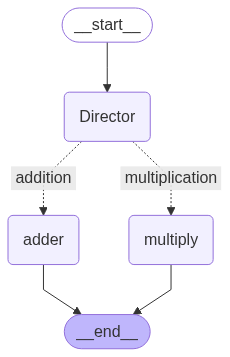

In [10]:
from IPython.display import display,Image
display(Image(build.get_graph().draw_mermaid_png()))

## Agent 2 (more dense)

In [12]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

class AgentState(TypedDict):
    number1:int
    number2:int
    operation1: Literal['+','-']
    final_number1:int
    number3:int
    number4:int
    operation2: Literal['+','-']
    final_number3:int

def adder1(state:StateGraph):
    state['final_number1'] = state['number1'] + state['number2']
    return state

def adder2(state:StateGraph):
    state['final_number2'] = state['number3'] + state['number4']
    return state

def sub1(state:StateGraph):
    state['final_number1'] = state['number1'] - state['number2']
    return state

def sub2(state:StateGraph):
    state['final_number2'] = state['number3'] - state['number4']
    return state

def decider1(state:StateGraph):
    if state['operator1'] == '+':
        return  "addition"
    else:
        return "subtraction"
    
def decider2(state:StateGraph):
    if state['operator2'] == '+':
        return  "addition"
    else:
        return "subtraction"


graph = StateGraph(AgentState)
graph.add_node("add_node1",adder1)
graph.add_node("sub_node1",sub1)
graph.add_node("sub_node2",sub2)
graph.add_node("add_node2",adder2)
graph.add_node("router1",lambda state:state)
graph.add_node("router2",lambda state:state)

graph.add_conditional_edges(
    "router1",
    decider1,
    {
        "addition":"add_node1",
        "subtraction": "sub_node1"
    }
)
graph.add_conditional_edges(
    "router2",
    decider2,
    {
        "addition":"add_node2",
        "subtraction": "sub_node2"
    }
)
graph.add_edge(START,"router1")
graph.add_edge("add_node1","router2")
graph.add_edge("sub_node1","router2")
graph.add_edge("add_node2",END)
graph.add_edge("sub_node2",END)
build = graph.compile()

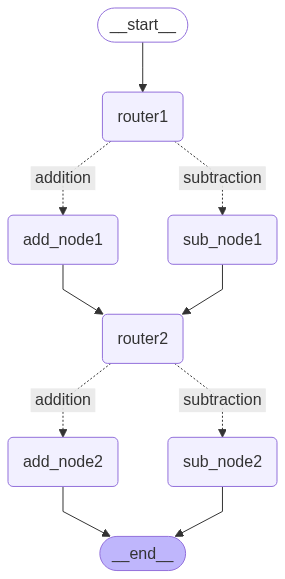

In [13]:
from IPython.display import display,Image
display(Image(build.get_graph().draw_mermaid_png()))